<a href="https://colab.research.google.com/github/baalasangar/MLAI/blob/master/14_Other/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Explainable AI (XAI)  is a set of tools and frameworks that can be used to understand and interpret how a machine learning model makes decisions

*   SHAP is a python library to understand predictions from regression and classification models built in Scikit-learn

* SHAP value - quantify feature’s contribution towards a prediction. 

* Shap value closer to zero means the feature contributes little to the prediction whereas shap value away from zero indicates the feature contributes more

## Example for Regression & Classification  

### Regression Example 

In [ ]:
# pip install shap

In [3]:
import numpy as np
np.set_printoptions(formatter={'float':lambda x:"{:.4f}".format(x)})
import pandas as pd
pd.options.display.float_format = "{:.3f}".format

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', context='talk', palette='rainbow')

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestRegressor, 
                              RandomForestClassifier)

import shap


In [19]:
# Import sample data
diabetes = load_diabetes()
X = diabetes['data'][:, :4] # Select first 4 columns
y = diabetes['target']
# Partition data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

print("Features names",diabetes["feature_names"][0:4])
print(f"Training features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}\n")
print(f"Test features shape: {X_test.shape}")
print(f"Test target shape: {y_test.shape}")

# Train a simple model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


Features names ['age', 'sex', 'bmi', 'bp']
Training features shape: (353, 4)
Training target shape: (353,)

Test features shape: (89, 4)
Test target shape: (89,)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
## create Explainer object and pass the model object 
explainer = shap.Explainer(model)
shap_test = explainer(X_test)
# shap_test 

shap_test - returns following three objects 


*   base_value or ( expected value ) - average of the target value in tghe training data --> y_train.mean()
*   data - same us X_train
* values - which is the SHAP value 
   -  prediction = base_value + sum( shap value for each prediction) 



In [33]:
### Base Values 
print(f"Expected value: {explainer.expected_value[0]:.1f}")
print(f"Average target value (training data): {y_train.mean():.1f}")
print(f"Base value: {np.unique(shap_test.base_values)[0]:.1f}")

Expected value: 153.4
Average target value (training data): 153.4
Base value: 153.4


In [35]:
### Shape Value 
## Checking --> prediction = base_value + sum( shap value for each prediction)

shap_df = pd.DataFrame(shap_test.values, 
                       columns=diabetes["feature_names"][0:4])

#shap_df

print( np.isclose(model.predict(X_test), 
           explainer.expected_value[0] + shap_df.sum(axis=1)) ) 

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


SHAP library come swith build-in visualization with 2 types 

* Global: Plots visualising feature’s overall contribution. This kind of plot shows an aggregated contribution of a feature over the entire data.
* Local: Plots showing feature’s contribution in a particular instance. This helps us drill down into individual predictions.



Features names ['age', 'sex', 'bmi', 'bp']


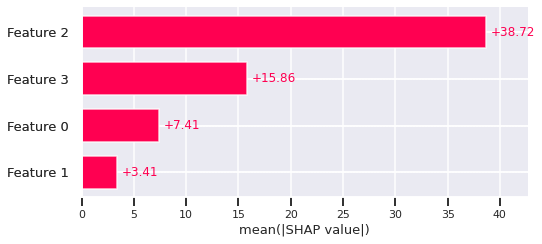

In [39]:
### Global Visualization  | Bar plot 


print("Features names",diabetes["feature_names"][0:4])
shap.plots.bar(shap_test)

* plot shows the strength of features’ contribution
* features are ranked from top to bottom where feature with the highest average absolute shap value is shown at the top

Features names ['age', 'sex', 'bmi', 'bp']


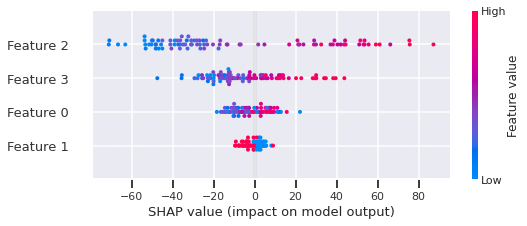

In [40]:
### Global Visualization  | Summary  plot

print("Features names",diabetes["feature_names"][0:4])
shap.summary_plot(shap_test)


In [42]:
### Global Visualization  | Force plot


shap.initjs()
shap.force_plot(explainer.expected_value, shap_test.values, 
                X_test)

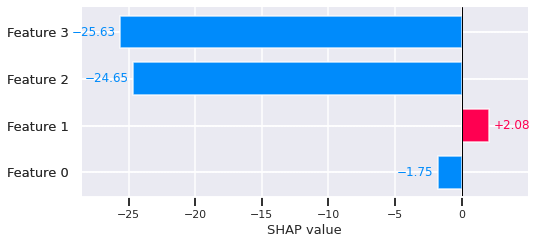

In [43]:
### Local Visualization  | Bar plot

shap.plots.bar(shap_test[0])


### Classification Example 

In [45]:
# Import sample data
df =  sns.load_dataset('titanic')
df['is_male'] = df['sex'].map({'male': 1, 'female': 0}) # Encode
# Keep numerical complete columns
df = df.select_dtypes('number').dropna() 
X = df.drop(columns=['survived'])
y = df['survived']
# Partition data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
print(f"Training features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}\n")
print(f"Test features shape: {X_test.shape}")
print(f"Test target shape: {y_test.shape}")
display(X_train.head())
display(y_train.head())

# Train a simple model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

Training features shape: (571, 6)
Training target shape: (571,)

Test features shape: (143, 6)
Test target shape: (143,)


,pclass,age,sibsp,parch,fare,is_male
830,3,15.000,1,0,14.454,0
565,3,24.000,2,0,24.150,1
148,2,36.500,0,2,26.000,1
105,3,28.000,0,0,7.896,1
289,3,22.000,0,0,7.750,0


830    1
565    0
148    0
105    0
289    1
Name: survived, dtype: int64

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [46]:
explainer = shap.Explainer(model)
shap_test = explainer(X_test)

shap_test - returns following three objects 


*   base_value or ( expected value ) - probability for each class
*   data - same us X_train
* values -  Will return  the shape value  for each feature and for each prediction class . in the above case , each feature  will have two shap value one for class 1 ( 0 ) and other for class 2 ( 1 ) 

In [48]:
### base_value 

print(f"Expected value: {explainer.expected_value[1]:.2f}")
print(f"Average target value (training data): {y_train.mean():.2f}")
print(f"Base value: {np.unique(shap_test.base_values)[0]:.2f}")

Expected value: 0.41
Average target value (training data): 0.41
Base value: 0.41


In [50]:
### Shap Value 

display(shap_test.values[0]) # 4 feature and Target class ( 0 or 1 ) 

array([[-0.1581, 0.1581],
       [-0.0367, 0.0367],
       [-0.0182, 0.0182],
       [-0.0059, 0.0059],
       [-0.0479, 0.0479],
       [-0.3006, 0.3006]])

In [51]:
shap_df = pd.DataFrame(shap_test.values[:,:,1], 
                       columns=shap_test.feature_names, 
                       index=X_test.index)

shap_df # shap values for positive class

,pclass,age,sibsp,parch,fare,is_male
689,0.158,0.037,0.018,0.006,0.048,0.301
278,-0.139,0.108,-0.174,0.003,-0.111,-0.100
506,0.111,0.002,0.023,-0.010,-0.010,0.350
9,0.081,0.045,0.015,-0.009,0.005,0.351
494,-0.102,-0.092,-0.003,-0.017,-0.071,-0.118
...,...,...,...,...,...,...
581,0.165,-0.016,0.019,-0.000,0.103,0.306
44,-0.157,-0.019,-0.004,-0.038,-0.126,0.252
234,-0.043,-0.074,0.003,-0.020,-0.042,-0.222
781,0.163,-0.001,0.015,-0.005,0.093,0.293


In [52]:
np.isclose(model.predict_proba(X_test)[:,1], 
           explainer.expected_value[1] + shap_df.sum(axis=1))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

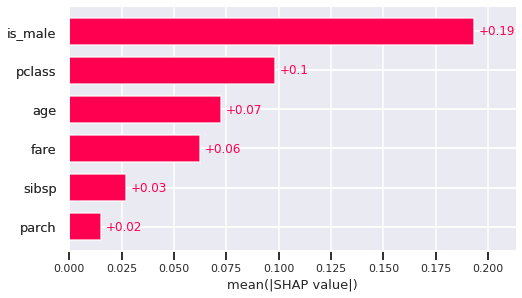

In [53]:
# Global | Bar plot
shap.plots.bar(shap_test[:,:,1])


Reference link - https://towardsdatascience.com/explaining-scikit-learn-models-with-shap-61daff21b12a

Next steps 
 - Explore how the prediction works for the multi-label classification 